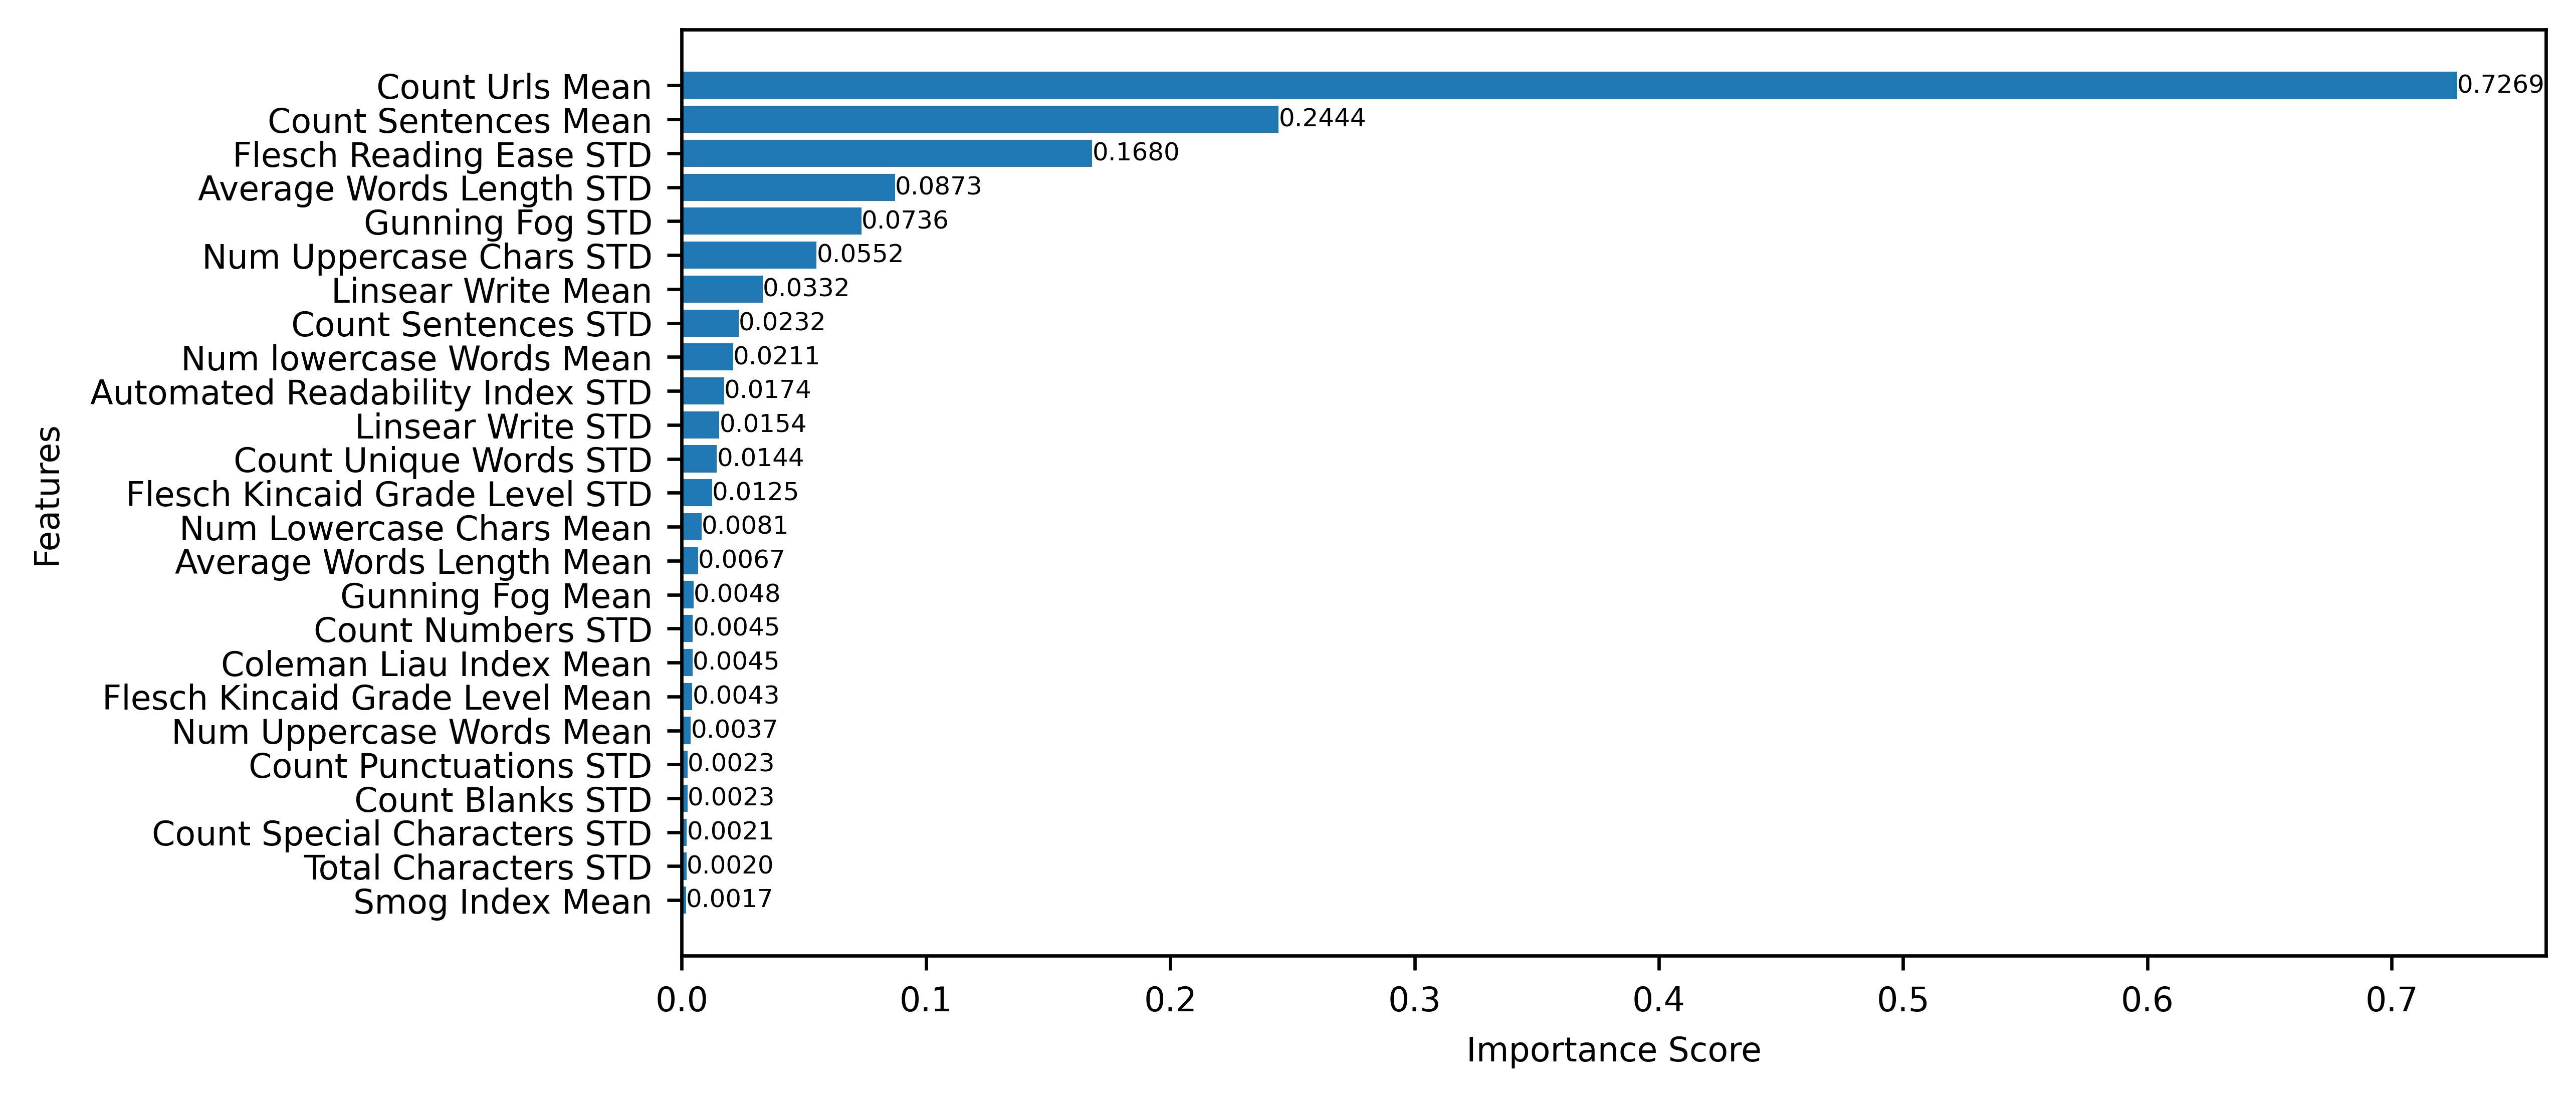

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

# Load the dataset
filename = '/content/Accounts.csv'
#filename = '/content/SingleTweets.csv'
dataset = pd.read_csv(filename)

# Remove NaN values
cols_with_nan = dataset.columns[dataset.isna().any()].tolist()
for col in cols_with_nan:
    if dataset[col].isna().any():
        dataset[col] = dataset.groupby('Class')[col].transform(lambda x: x.fillna(x.mode().iloc[0]))
    else:
        print(f"")

if "SingleTweets" in filename:
    X = dataset.iloc[:, 1:23].values
    y = dataset.iloc[:, 24].values
elif "Accounts" in filename:
    X = dataset.iloc[:, 1:46].values
    y = dataset.iloc[:, 47].values
else:
    print("No file is chosen")

# RandomForestRegressor with oob_score=True
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Fit the model
rf.fit(X, y)

# Perform permutation importance using OOB samples
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Sort the features based on permutation importance
sorted_idx = result.importances_mean.argsort()

# Indices of the top features
if "SingleTweets" in filename:
    indices = sorted_idx[-15:]
else:
    indices = sorted_idx[-25:]

# feature importances
plt.rcParams.update({'figure.figsize': (8.0, 4.0), 'figure.dpi': 600})
plt.rcParams.update({'font.size': 8})

# Plotting
plt.barh(dataset.columns[1:46][indices], result.importances_mean[indices])
plt.ylabel("Features")
plt.xlabel("Importance Score")
plt.tick_params(axis='both', which='major', labelsize=8)

# Annotatation
for i, value in enumerate(result.importances_mean[indices]):
    plt.text(value, i, f"{value:.4f}", va='center', fontsize=6)
plt.show()